In [ ]:
!pip install tensorflow-datasets

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



In [ ]:
dataset, info = tfds.load('horses_or_humans', with_info=True, as_supervised=True)

In [ ]:
class_names = info.features['label'].names
class_names

['horses', 'humans']

In [ ]:
for i, example in enumerate(dataset['train']):
  image,label = example[0], example[1]
  save_dir = './horse-or-human/train/{}'.format(class_names[label])
  os.makedirs(save_dir, exist_ok=True)

  filename = '{}_{}.jpg'.format(class_names[label], i)
  filepath = save_dir + "/" + filename

  tf.keras.preprocessing.image.save_img(filepath, image)

In [ ]:
for i, example in enumerate(dataset['test']):
  image,label = example[0], example[1]
  save_dir = './horse-or-human/test/{}'.format(class_names[label])
  os.makedirs(save_dir, exist_ok=True)

  filename = '{}_{}.jpg'.format(class_names[label], i)
  filepath = save_dir + "/" + filename

  tf.keras.preprocessing.image.save_img(filepath, image)

In [ ]:
training_data=os.listdir("/content/horse-or-human/train")
test_data=os.listdir("/content/horse-or-human/test")

In [ ]:

input=[]
label=[]
for folders in training_data:
  for fea in os.listdir("/content/horse-or-human/train"+'/horses'):
     input.append(os.path.join("/content/horse-or-human/train"+'/horses/',fea))
     fea="horse"
     label.append(fea)
  for features in os.listdir("/content/horse-or-human/train"+'/humans'):
    input.append(os.path.join("/content/horse-or-human/train"+'/humans/',features))
    features="human"
    label.append(features)

In [ ]:
image=input
label=label
df=pd.DataFrame(image,columns=['image'])
df['label']=label
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
df['label']=lr.fit_transform(df['label'])
df.head()



,image,label
0,/content/horse-or-human/train/horses/horses_77...,0
1,/content/horse-or-human/train/horses/horses_96...,0
2,/content/horse-or-human/train/horses/horses_80...,0
3,/content/horse-or-human/train/horses/horses_19...,0
4,/content/horse-or-human/train/horses/horses_72...,0


In [ ]:
df['label'].value_counts()
#ImbalancedDataset


1    1054
0    1000
Name: label, dtype: int64

In [ ]:
#BalancingDataset
l=[]
for num in range(2000,2054):
  l.append(num)
len(l)
df=df.drop(index=l)

In [ ]:
df['label'].value_counts()

0    1000
1    1000
Name: label, dtype: int64

In [ ]:
df=df.sample(frac=1).reset_index(drop=True)
df.head()

,image,label
0,/content/horse-or-human/train/horses/horses_13...,0
1,/content/horse-or-human/train/humans/humans_74...,1
2,/content/horse-or-human/train/humans/humans_90...,1
3,/content/horse-or-human/train/horses/horses_15...,0
4,/content/horse-or-human/train/horses/horses_74...,0


<Axes: xlabel='label', ylabel='count'>

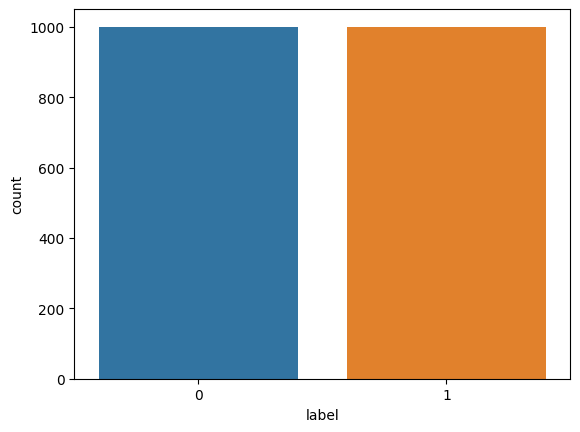

In [ ]:
import seaborn as sns
sns.countplot(df,x=df['label'])

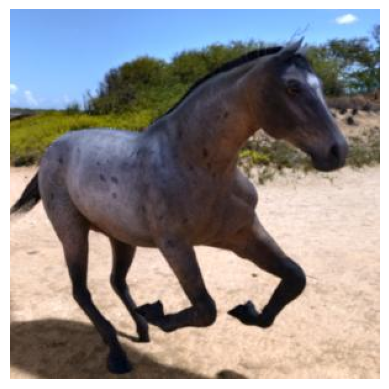

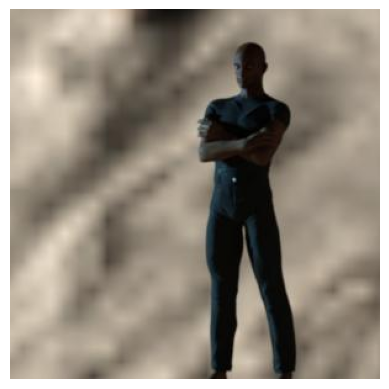

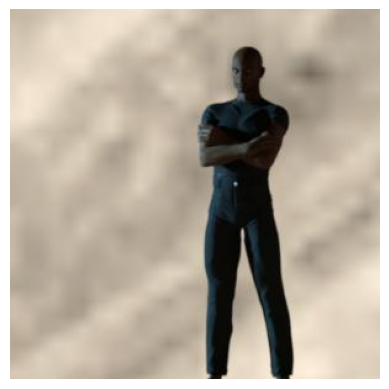

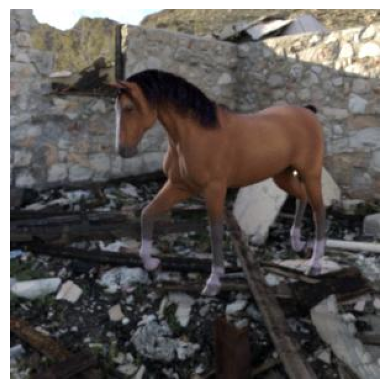

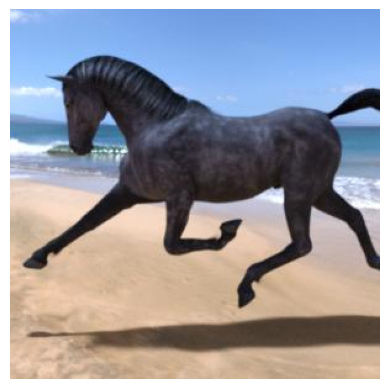

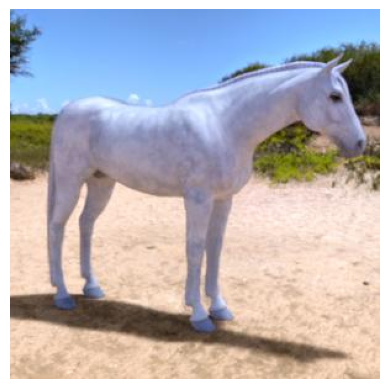

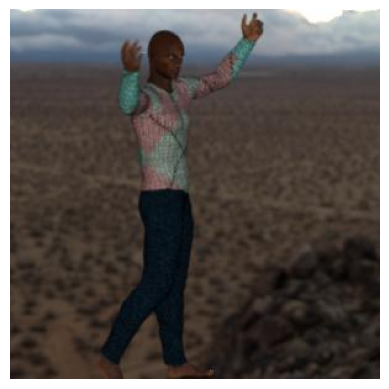

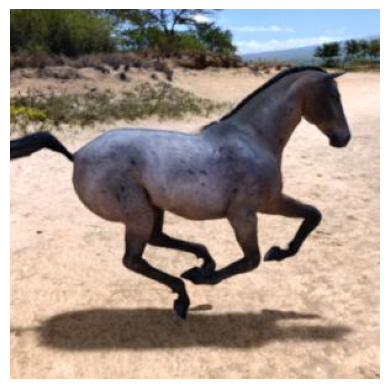

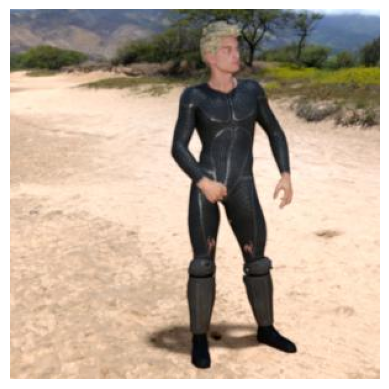

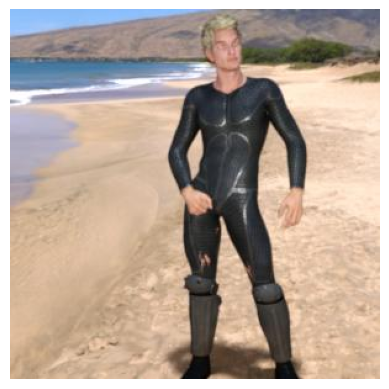

In [ ]:
#DataVisualisation
for i in range(0,10):
  img=mpimg.imread(df['image'][i])
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [ ]:
plt.figure(figsize=(25,25))
for i in range(0,2):


  img=mpimg.imread(df['image'][i])
  plt.subplot(2,1,i)
  plt.imshow(img)
  plt.show()

ValueError: ignored

<Figure size 2500x2500 with 0 Axes>

In [ ]:
 df['image'][0]

'/content/horse-or-human/train/humans/horses_832.jpg'

In [ ]:
/content/horse-or-human/train/horses/horses_832.jpg